Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1.Title: Pima Indians Diabetes Database


2.Sources: (a) Original owners: National Institute of Diabetes and Digestive and
                 Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                   Research Center, RMI Group Leader
                   Applied Physics Laboratory
                   The Johns Hopkins University
                   Johns Hopkins Road
                   Laurel, MD 20707
                   (301) 953-6231

(c) Date received: 9 May 1990


Continuous Features:
•Number of times pregnant
•Plasma glucose concentration a 2 hours in an oral glucose tolerance test
•Diastolic blood pressure (mm Hg)
•Triceps skin fold thickness (mm)
•2-Hour serum insulin (mu U/ml)
•Body mass index (weight in kg/(height in m)^2)
•Diabetes pedigree function


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
import numpy as np
import pandas as pd


In [2]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

# Normalize the data using lambda function 
# In this scenario, class is the outcome result , excpet class all columns considreed for Normalisation


In [6]:
cols_to_norm

['Number_pregnant',
 'Glucose_concentration',
 'Blood_pressure',
 'Triceps',
 'Insulin',
 'BMI',
 'Pedigree']

In [7]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [8]:
# View the Top records after Normalisation
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Use Feature column feature to categorise the data--> Age and Group columns

In [9]:
no_preg=tf.feature_column.numeric_column('Number_pregnant')
glu_Conc=tf.feature_column.numeric_column('Glucose_concentration')
blood_Pre=tf.feature_column.numeric_column('Blood_pressure')
tric=tf.feature_column.numeric_column('Triceps')
ins=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
pedig=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column( 'Age')

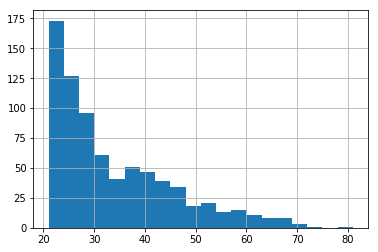

In [10]:
diabetes['Age'].hist(bins=20)

In [11]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
age_group=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [25]:
feat_cols = [no_preg ,glu_Conc,blood_Pre ,tric ,ins,bmi,pedig ,age_group,assigned_group]

# split the data for train and test

In [26]:
X_data=diabetes.drop('Class',axis=1)

In [27]:
y_data=diabetes['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.3, random_state=101)

#  Input Function

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [31]:
#Create the model
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\raprabhu\\AppData\\Local\\Temp\\tmpsk6co7r1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026F02C7AA20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\raprabhu\AppData\Local\Temp\tmpsk6co7r1\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 126.349
INFO:tensorflow:loss = 5.3982077, step = 101 (0.794 sec)
INFO:tensorflow:global_step/sec: 250.665
INFO:tensorflow:loss = 4.684053, step = 201 (0.402 sec)
INFO:tensorflow:global_step/sec: 260.643
INFO:tensorflow:loss = 5.654226, step = 301 (0.385 sec)
INFO:tensorflow:global_step/sec: 272.642
INFO:tensorflow:loss = 6.695857, step = 401 (0.367 sec)
INFO:tensorflow:global_step/sec: 257.098
INFO:

# Evaluation model

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [34]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-19T01:26:37Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\raprabhu\AppData\Local\Temp\tmpsk6co7r1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-19-01:26:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.79563785, auc_precision_recall = 0.6330583, average_loss = 0.52813005, global_step = 1000, label/mean = 0.35064936, loss = 5.0832515, precision = 0.6615385, prediction/mean = 0.36166754, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\raprabhu\AppData\

In [35]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79563785,
 'auc_precision_recall': 0.6330583,
 'average_loss': 0.52813005,
 'label/mean': 0.35064936,
 'loss': 5.0832515,
 'precision': 0.6615385,
 'prediction/mean': 0.36166754,
 'recall': 0.5308642,
 'global_step': 1000}

# Accuracy =74%

In [ ]:
##Now let's do some predections using test data

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [37]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [39]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\raprabhu\AppData\Local\Temp\tmpsk6co7r1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.1312015], dtype=float32),
  'logistic': array([0.5327534], dtype=float32),
  'probabilities': array([0.4672466, 0.5327534], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.41710556], dtype=float32),
  'logistic': array([0.6027904], dtype=float32),
  'probabilities': array([0.39720958, 0.6027905 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.46179146], dtype=float32),
  'logistic': array([0.38656095], dtype=float32),
  'probabilities': array([0.6134391 , 0.38656095], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.7129275], dtype=float32),
  'logistic': array([0.3289523], dtype=float32),
  'probabilities': array([0.67104775, 0.3289523 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': a

# Dense Nueral network Classifer Method

In [40]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [45]:
feat_cols = [no_preg ,glu_Conc,blood_Pre ,tric ,ins,bmi,pedig ,age_group,embedded_group_column]

In [48]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\raprabhu\\AppData\\Local\\Temp\\tmpqeuqrkyo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026F0C9A21D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\raprabhu\AppData\Local\Temp\tmpqeuqrkyo\model.ckpt-54700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 54700 into C:\Users\raprabhu\AppData\Local\Temp\tmpqeuqrkyo\model.ckpt.
INFO:tensorflow:loss = 3.6079786, step = 54701
INFO:tensorflow:global_step/sec: 142.025
INFO:tensorflow:loss = 3.2192903, step = 54801 (0.704 sec)
INFO:tensorflow:global_step/sec: 248.234
INFO:tensorflow:loss = 3.3015342, step = 54901 (0.405 sec)
INFO:tensorflow:global_step/sec: 225.933
INFO:tensorflow:loss = 2.6110477, step = 55001 (0.443 sec)
INFO:tensorflow:global_step/sec: 237.752
INFO:tensorflow:loss = 4.8664722, step = 55101 (0.420 sec)
INFO:tensorflow:global_step/sec: 233.502
INFO:tensorflow:loss = 3.4576602, step = 55201 (0.428 se

In [52]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-19T13:51:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\raprabhu\AppData\Local\Temp\tmpqeuqrkyo\model.ckpt-55700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-19-13:51:20
INFO:tensorflow:Saving dict for global step 55700: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.76703703, auc_precision_recall = 0.63194036, average_loss = 0.8108349, global_step = 55700, label/mean = 0.35064936, loss = 7.8042855, precision = 0.6438356, prediction/mean = 0.32849222, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 55700: C:\Users\raprabhu\AppData\Local\Temp\tmpqeuqrkyo\model.ckpt-55700


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.76703703,
 'auc_precision_recall': 0.63194036,
 'average_loss': 0.8108349,
 'label/mean': 0.35064936,
 'loss': 7.8042855,
 'precision': 0.6438356,
 'prediction/mean': 0.32849222,
 'recall': 0.5802469,
 'global_step': 55700}

# TF-DNN Classifier Accuracy is 74% which is very much close to TF-Linear classifier